<a href="https://colab.research.google.com/github/TomPhanAnh/Kaggle-Solution/blob/main/Volcanic_Eruptions_in_the_Holocene_Period.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

# **Import dataset:** *Volcanic Eruptions in the Holocene Period*

In [ ]:
vocalno = pd.read_csv('database.csv')
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

# **Data Understanding**

In [ ]:
vocalno.shape

(1508, 12)

In [ ]:
vocalno.head(1)

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.17,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)


In [ ]:
for i in vocalno.iloc[:,np.r_[1,3:6,9:11]].columns:
  print('Observation in column: {}'.format(i))
  print(vocalno[i].value_counts())
  print(100*'*')
  print('\n')

Observation in column: Name
Unnamed        23
Sumbing         2
Plosky          2
San Diego       2
Azul, Cerro     2
               ..
Parker          1
Balut           1
Jolo            1
Bombalai        1
Melville        1
Name: Name, Length: 1478, dtype: int64
****************************************************************************************************


Observation in column: Region
South America                     197
Indonesia                         142
Japan, Taiwan, Marianas           141
Kamchatka and Mainland Asia       132
Africa and Red Sea                131
México and Central America        120
Alaska                             88
Melanesia and Australia            80
Canada and Western USA             71
Philippines and SE Asia            62
New Zealand to Fiji                60
Middle East and Indian Ocean       46
Kuril Islands                      46
Mediterranean and Western Asia     44
Iceland and Arctic Ocean           34
Antarctica                      

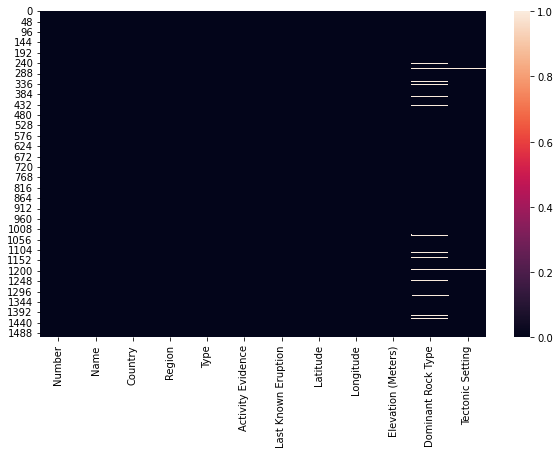

In [ ]:
# Checking null Dataset
plt.figure(figsize = (10,6))
sns.heatmap(vocalno.isnull())

In [ ]:
vocalno.describe()

,Number,Latitude,Longitude,Elevation (Meters)
count,1508.000000,1508.000000,1508.000000,1508.000000
mean,296656.110743,14.083156,23.391469,1683.357427
std,48861.852600,31.871107,113.656588,1571.102885
min,210010.000000,-78.500000,-179.970000,-4200.000000
25%,261157.500000,-7.068750,-78.274250,687.250000
50%,300015.000000,13.861500,38.390000,1464.000000
75%,342123.250000,41.748750,138.578000,2352.250000
max,390847.000000,85.608000,179.580000,6879.000000


# **Data Preparation**

In [ ]:
vocalno.dropna(subset = ['Activity Evidence','Dominant Rock Type', 'Tectonic Setting'], axis = 0, inplace = True)

In [ ]:
# Create 2 columns included Year and Era to seperate the time BCE and CE
vocalno['Year'] = np.zeros(1455)
vocalno['Era']  = np.zeros(1455)

for i in range(0,vocalno.shape[0]):
  vocalno['Year'][i] = vocalno.iloc[i,:]['Last Known Eruption'].split(" ")[0]
  vocalno['Era'][i]  = vocalno.iloc[i,:]['Last Known Eruption'].split(" ")[1]
vocalno.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


IndexError: ignored

In [ ]:
# Data in BCE
data_BCE = vocalno.loc[vocalno['Era'] == 'BCE','Year'].value_counts().to_frame()
data_BCE.reset_index(inplace = True)
data_BCE.rename(columns = {'index':'Year_','Year':'Times'}, inplace = True)
data_BCE = data_BCE.astype('int').sort_values(by = 'Year_', ascending = False)

# **Digging in dataset using Data Visualization for Insights**

In [ ]:
plt.plot(data_BCE['Year_'], data_BCE['Times'])

In [ ]:
sns.set_theme(style = 'ticks')
# Initialize the figure with a logarithmic * axis 
f, ax = plt.subplots(figsize = (7,6))
ax.set_xscale('log')

# Plot the data
sns.histplot(data = data_BCE, x = 'Times', kde = True,stat = 'percent')

In [ ]:
sns.boxplot(data = data_BCE, x = 'Times')

In [ ]:
# Data in CE
data_CE = vocalno.loc[vocalno['Era'] == 'CE','Year'].value_counts().to_frame()
data_CE.reset_index(inplace = True)
data_CE.rename(columns = {'index':'Year_','Year':'Times'}, inplace = True)
data_CE = data_CE.astype('int').sort_values(by = 'Year_', ascending = False)

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(data_CE['Year_'], data_CE['Times'])

In [ ]:
sns.set_theme(style = 'ticks')
# Initialize the figure with a logarithmic * axis 
f, ax = plt.subplots(figsize = (7,6))
ax.set_xscale('log')

# Plot the data
sns.histplot(data = data_CE, x = 'Times', kde = True,stat = 'percent')

In [ ]:
sns.boxplot(data = data_CE, x = 'Times')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
vocalno['Number'] = scale.fit_transform(np.array(vocalno['Number']).reshape(-1,1))


In [ ]:
vocalno.head(1)

In [ ]:

sns.relplot(data = vocalno.loc[(vocalno['Era'] != "Unknown") & (vocalno['Era'] != 0.0) & (vocalno['Elevation (Meters)'] > 0)], x = 'Number', y = 'Elevation (Meters)',
            hue= "Era", size = 'Activity Evidence',
            palette="ch:r=-.5,l=.75", sizes=(1,50),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [ ]:
pip install pycountry_convert

In [ ]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
def country_to_continent(country_name):
  try:
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
  except:
    return 'na'

In [ ]:
vocalno['Continent'] = vocalno['Country'].apply(lambda x: country_to_continent(x))

In [ ]:
vocalno.head(1)

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,Continent
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.17,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km),Europe


# **Data Visualization Data on World Maps**

**Applying Folium and Plotly** to visualize World Maps Volcanic Eruptions in the  Holocene Period

In [ ]:
def country_to_iso_code(country):
  try :
    return pc.country_name_to_country_alpha3(country)
  except:
    return 'na'
vocalno['iso_code'] = vocalno['Country'].apply(lambda x: country_to_iso_code(x))

In [ ]:
import folium 
vocalno_no_zeros = vocalno.loc[vocalno['Elevation (Meters)'] > 0]
m = folium.Map(location = [vocalno_no_zeros.iloc[0,:]['Latitude'],
                           vocalno_no_zeros.iloc[0,:]['Longitude']],
               zoom_start = 5)
for i in range(0, len(vocalno_no_zeros)):
  folium.Circle(location = [vocalno_no_zeros.iloc[i,:]['Latitude'],
                vocalno_no_zeros.iloc[i,:]['Longitude']],
                radius = 100*vocalno_no_zeros.iloc[i,:]['Elevation (Meters)'].astype('float64')).add_to(m)
m


In [ ]:
# World wide mapping function
def plot_ww_numbers(data, color, hover_data, title):
  fig = px.choropleth(data, locations = 'iso_code', 
                      color = color, hover_data = hover_data,
                      color_continuous_scale = px.colors.sequential.Plasma)
  layout = go.Layout(title = go.layout.Title(
      text = f"<b> {title} </b>",
      x = 0.5),
      font = dict(size = 14),
      width = 750,
      height = 350,
      margin = dict(l = 0, r = 0, b = 0, t = 30))
  
  fig.update_layout(layout)
  fig.show()

In [ ]:
# Create data calculating the number of Volcanic Eruption in the World
number_volcanic = vocalno.groupby('iso_code').count()['Number'].to_frame().reset_index()

In [ ]:
plot_ww_numbers(data = number_volcanic,
               color = 'Number',
               hover_data = ['iso_code','Number'],
               title = 'Number of Volcanic Eruption in the Holocene Period')

In [ ]:
vocalno.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,Continent,iso_code
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km),Europe,DEU
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km),Europe,FRA
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km),Europe,ESP
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km),Europe,ESP
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km),Europe,ITA
